In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import layout
from bokeh.models import CategoricalColorMapper, Legend
import numpy as np
%matplotlib inline  

In [2]:
consumption = pd.read_csv('newfish-and-seafood-consumption-per-capita.csv')

In [3]:
production = pd.read_csv('seafood-and-fish-production-thousand-tonnes.csv')

In [4]:
c_entity = consumption[['Entity','Year','Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)','TotalC']]
p_entity = production[['Entity','Year','Total']]

In [5]:
c_Na = c_entity[c_entity["Entity"]=='Namibia']
c_C = c_entity[c_entity["Entity"]=='China']
c_N = c_entity[c_entity["Entity"]=='Norway']
p_Na = p_entity[p_entity["Entity"]=='Namibia']
p_C = p_entity[p_entity["Entity"]=='China']
p_N = p_entity[p_entity["Entity"]=='Norway']

In [6]:
c_Na = c_Na.set_index("Year")
c_C = c_C.set_index("Year")
c_N = c_N.set_index("Year")
p_Na = p_Na.set_index("Year")
p_C = p_C.set_index("Year")
p_N = p_N.set_index("Year")

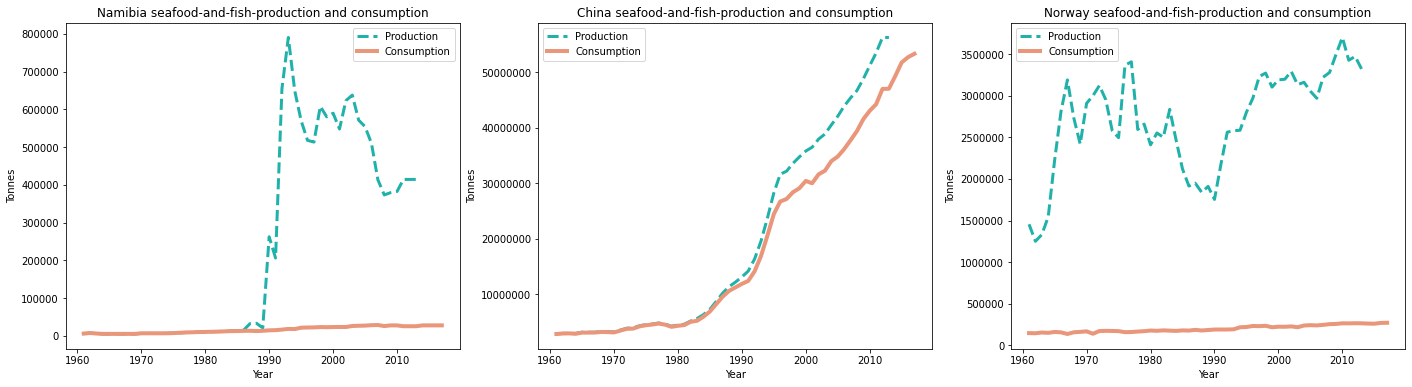

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(24,6))

axs[0].plot(p_Na['Total'],color='lightseagreen', linewidth=3,linestyle='dashed',label="Production")
axs[0].plot(c_Na['TotalC'],color='#E9967A', linewidth=4, label='Consumption')
axs[0].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[0].set_title('Namibia seafood-and-fish-production and consumption')
axs[0].set_ylabel('Tonnes')
axs[0].set_xlabel('Year')
axs[0].legend()

axs[1].plot(p_C['Total'],color='lightseagreen',linewidth=3,linestyle='dashed',label='Production')
axs[1].plot(c_C['TotalC'],color='#E9967A', linewidth=4, label='Consumption')
axs[1].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[1].set_title('China seafood-and-fish-production and consumption')
axs[1].set_ylabel('Tonnes')
axs[1].set_xlabel('Year')
axs[1].legend()

axs[2].plot(p_N['Total'],color='lightseagreen', linewidth=3,linestyle='dashed',label='Production')
axs[2].plot(c_N['TotalC'],color='#E9967A', linewidth=4, label='Consumption')
axs[2].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[2].set_title('Norway seafood-and-fish-production and consumption')
axs[2].set_ylabel('Tonnes')
axs[2].set_xlabel('Year')
axs[2].legend()

In [8]:
population = pd.read_csv('population_total.csv')

In [9]:
i = pd.read_csv('FAOSTAT_import.csv')
e = pd.read_csv('FAOSTAT_export.csv')

In [10]:
i_Na =i[(i["Area"]=='Namibia')]
i_C = i[(i["Area"]=='China')]
i_N = i[(i["Area"]=='Norway')]
e_Na =e[(e["Area"]=='Namibia')]
e_C = e[(e["Area"]=='China')]
e_N = e[(e["Area"]=='Norway')]

i_Na = i_Na.set_index("Year")
i_C = i_C.set_index("Year")
i_N = i_N.set_index("Year")
e_Na = e_Na.set_index("Year")
e_C = e_C.set_index("Year")
e_N = e_N.set_index("Year")

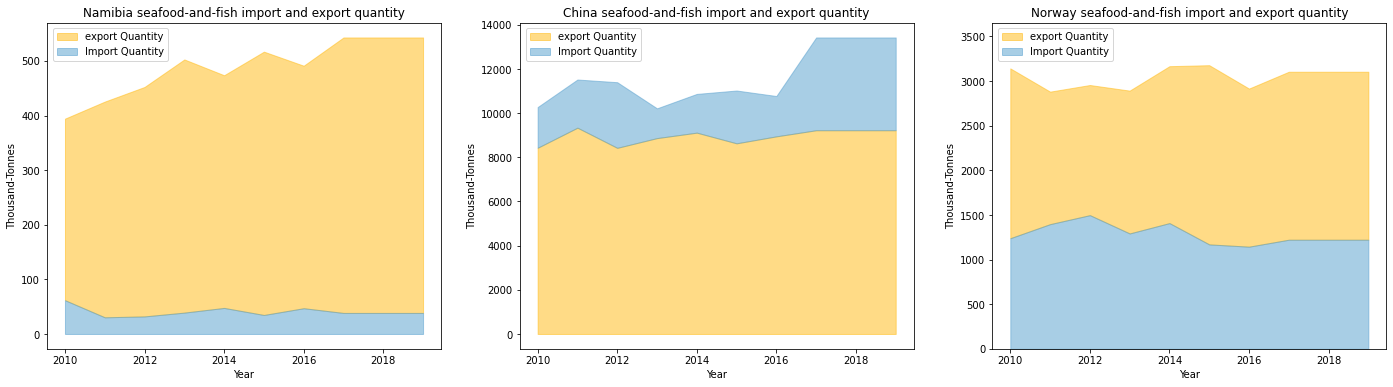

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(24,6))

x = i_Na.index

axs[0].fill_between(x,e_Na['Value'],i_Na['Value'],color='#FFB90F',alpha=0.5,label="export Quantity")
axs[0].fill_between(x,i_Na['Value'],0,color='#539ecd',alpha=0.5,label="Import Quantity")
axs[0].set_title('Namibia seafood-and-fish import and export quantity')
axs[0].set_ylabel('Thousand-Tonnes')
axs[0].set_xlabel('Year')
axs[0].legend(bbox_to_anchor=(0.32, 1))


axs[1].fill_between(x,e_C['Value'],0,color='#FFB90F',alpha=0.5,label="export Quantity")
axs[1].fill_between(x,i_C['Value'],e_C['Value'],color='#539ecd',alpha=0.5,label="Import Quantity")
axs[1].set_title('China seafood-and-fish import and export quantity')
axs[1].set_ylabel('Thousand-Tonnes')
axs[1].set_xlabel('Year')
axs[1].legend(bbox_to_anchor=(0.32, 1))

axs[2].fill_between(x,e_N['Value'],i_N['Value'],color='#FFB90F',alpha=0.5,label="export Quantity")
axs[2].fill_between(x,i_N['Value'],0,color='#539ecd',alpha=0.5,label="Import Quantity")
axs[2].set_ylim([0, 1.15*max(e_N['Value'])])
axs[2].set_title('Norway seafood-and-fish import and export quantity')
axs[2].set_ylabel('Thousand-Tonnes')
axs[2].set_xlabel('Year')
axs[2].legend(bbox_to_anchor=(0.32, 1))

In [12]:
pro = pd.read_csv('animal-protein-consumption.csv')

In [13]:
protein = pro[((pro["Entity"]=='China')|(pro["Entity"]=='Norway')|(pro["Entity"]=='Namibia'))]

In [14]:
protein = protein[protein["Year"]==2017]
protein = protein.drop(columns=['Code','Year','Other meat'])
protein = protein.set_index('Entity')

In [15]:
countries = ['China','Norway','Namibia']

In [16]:
protein_sum = []
protein_sum = protein.sum(axis=1)

In [17]:
entities = ['Poultry','Pork','Beef','Lamb & goat','Eggs','Milk','Fish, Seafood']
colors=['#53868B','#FFB90F','#C1FFC1','#CDAD00','#E9967A','#BF3EFF','#e84d60']

In [18]:
protein_cds = {}
protein_cds['countries'] = list(protein.index.values)
for food in list(protein.columns):
    protein_cds[food] = list((protein[food].values/protein_sum)*100)

In [19]:
tooltips = [
    ('Country', '@countries'),
    ('Source', '$name'),
    ('Percent', '@$name%')]

In [20]:
p = figure(y_range=countries, plot_width=900,plot_height=500, x_range=(1,101),
           title="Protein Supply Per Capita", toolbar_location=None,tools="save",tooltips=tooltips)

p.hbar_stack(entities, y='countries', height=0.9, color=colors, source=ColumnDataSource(protein_cds),
             legend_label=["%s" % x for x in entities])

p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.click_policy = "hide" 
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = '%'
p.yaxis.axis_label = 'Country'
new_legend = p.legend[0]
p.add_layout(new_legend, 'above')

output_notebook()
show(p)

Loading BokehJS ...

In [21]:
gg = pd.read_csv('ghg-per-protein-poore.csv')

In [22]:
gg = gg.drop(columns=['Code','Year'])
gg = gg.query(f'Entity in {entities}')

In [23]:
pro = protein.T
pro = pro.reset_index()
pro = pro.rename(columns = {'index':'Entity'})

In [24]:
protein_gg = pd.merge(gg, pro)

In [25]:
protein_gg['China'] = protein_gg['China']*protein_gg['GHG emissions per 100g protein (Poore & Nemecek, 2018)']
protein_gg['Norway'] = protein_gg['Norway']*protein_gg['GHG emissions per 100g protein (Poore & Nemecek, 2018)']
protein_gg['Namibia'] = protein_gg['Namibia']*protein_gg['GHG emissions per 100g protein (Poore & Nemecek, 2018)']

In [26]:
cgg = ['China','Norway','Namibia']
country_gg = protein_gg.drop(columns=['GHG emissions per 100g protein (Poore & Nemecek, 2018)'])

In [27]:
country_gg = country_gg.set_index('Entity')
country_gg = country_gg.transpose()

In [28]:
country_gg

Entity,Beef,Eggs,"Fish, Seafood",Lamb & goat,Milk,Pork,Poultry
China,105.267202,30.008201,54.209209,24.217091,25.840,86.352596,23.763222
Namibia,118.238516,1.683490,20.500285,26.400600,54.625,10.727503,24.219111
Norway,351.722167,15.235580,88.276738,35.730135,204.440,46.333684,44.506178


In [29]:
gg_sum = []
gg_sum = country_gg.sum(axis=1)

In [30]:
gg_cds = {}
gg_cds['countries'] = list(country_gg.index.values)
for food in list(country_gg.columns):
    gg_cds[food] = list((country_gg[food].values/gg_sum)*100)

In [31]:
tooltips = [
    ('Country', '@countries'),
    ('Source', '$name'),
    ('Percent', '@$name%')]

In [32]:
p = figure(y_range=cgg, plot_width=900,plot_height=500, x_range=(1,101),
           title="Greenhouse gas emissions per 100 grams of protein", toolbar_location=None,tools="save",tooltips=tooltips)

p.hbar_stack(entities, y='countries', height=0.9, color=colors, source=ColumnDataSource(gg_cds),
             legend_label=["%s" % x for x in entities])

p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.click_policy = "hide" 
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = '%'
p.yaxis.axis_label = 'Country'
new_legend = p.legend[0]
p.add_layout(new_legend, 'above')

output_notebook()
show(p)

Loading BokehJS ...

# unsustainable 

## Fishing methods

In [33]:
fish_catch_methods = pd.read_csv('fish-catch-gear-type.csv')

In [34]:
fcm = fish_catch_methods[((fish_catch_methods["Entity"]=='China')|(fish_catch_methods["Entity"]=='Norway')|(fish_catch_methods["Entity"]=='Namibia'))]
fcm = fcm.fillna(0)

In [35]:
fcm['gear'] = fcm['other_gear'] + fcm['unknown_gear']
fcm = fcm.drop(columns=['Code','unknown_gear','other_gear'])
fcm = fcm.sort_values(by=['Year'])
fcm = fcm.set_index('Year')

In [36]:
methods = ['longline', 'gillnet','small_scale','purse_seine','pelagic trawl','bottom_trawl','gear']

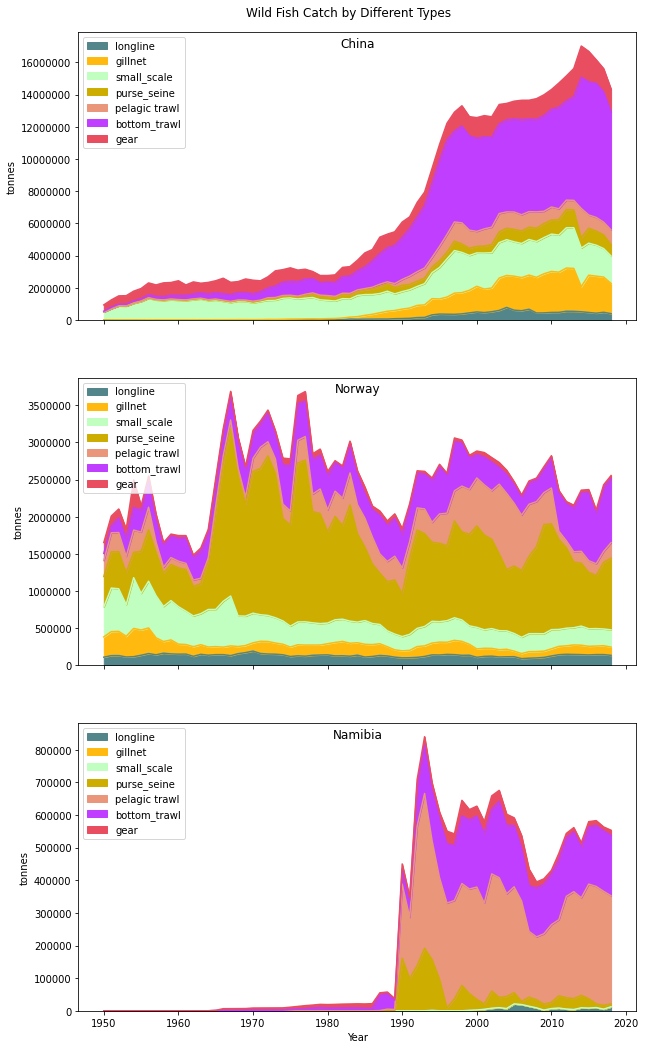

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,18), sharex=True)
fig.suptitle('Wild Fish Catch by Different Types', y = 0.9)

for i in range(3):
    fcm[fcm['Entity'] == countries[i]].plot.area(ax=axes[i],color=colors)
#         crimeGroupByYear.plot.bar(ax=row,color='lavender',edgecolor = 'mediumpurple')
    axes[i].set_ylabel("tonnes")
#     axes[i].set_ylim([0, *.max()])
    axes[i].ticklabel_format(style='plain', axis='both',useOffset=False)
    axes[i].set_title(countries[i], y=1, pad=-15)
#         row.set_ylim([0, 1.3*crimeGroupByYear.max()])

# Fish health

In [38]:
fish_health = pd.read_csv('biomass-fish-stocks-region.csv')

In [39]:
fh = fish_health[((fish_health["Entity"]=='Pacific Ocean tunas')|(fish_health["Entity"]=='Europe-non-EU NE Atl')|(fish_health["Entity"]=='West Africa'))]
regions = ['Pacific Ocean tunas','Europe-non-EU NE Atl','West Africa']

In [40]:
fh = fh.drop(columns=['Code'])
fh = fh.set_index('Year')

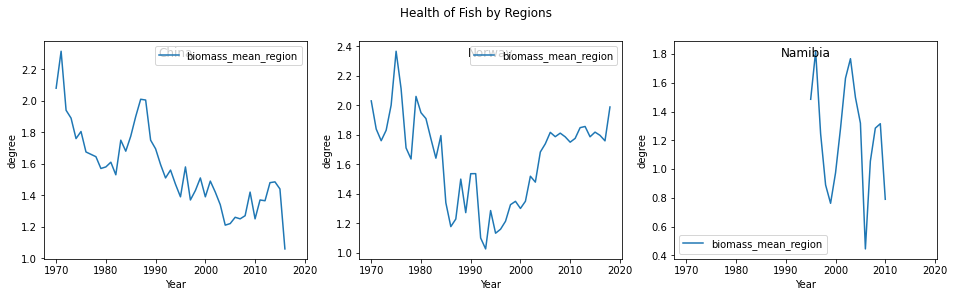

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharex=True)
fig.suptitle('Health of Fish by Regions', y = 1)


for i in range(3):
    fh[fh['Entity'] == regions[i]].plot(ax=axes[i])
    
#         crimeGroupByYear.plot.bar(ax=row,color='lavender',edgecolor = 'mediumpurple')
    axes[i].set_ylabel("degree")
    axes[i].set_title(countries[i], y=1, pad=-15)
#         row.set_ylim([0, 1.3*crimeGroupByYear.max()])

# discard by trawl

In [42]:
fish_landings_discards = pd.read_csv('fish-landings-and-discards.csv')

In [43]:
fish_landings_discards

,Entity,Code,Year,discards,landings
0,Albania,ALB,1950,155.824094,1000.000000
1,Albania,ALB,1951,171.406503,1100.000000
2,Albania,ALB,1952,218.153731,1400.000000
3,Albania,ALB,1953,264.900959,1700.000000
4,Albania,ALB,1954,249.318550,1600.000000
...,...,...,...,...,...
13725,Yemen,YEM,2014,3541.482250,581345.205125
13726,Yemen,YEM,2015,3041.661500,476739.651684
13727,Yemen,YEM,2016,2600.452625,408317.313015
13728,Yemen,YEM,2017,2224.067750,348329.778789


In [44]:
fld = fish_landings_discards[((fish_landings_discards["Entity"]=='China')|(fish_landings_discards["Entity"]=='Norway')|(fish_landings_discards["Entity"]=='Namibia'))]
fld = fld.drop(columns=['Code'])
fld = fld.fillna(0)
fld = fld.sort_values(by=['Year'])
fld = fld.set_index('Year')

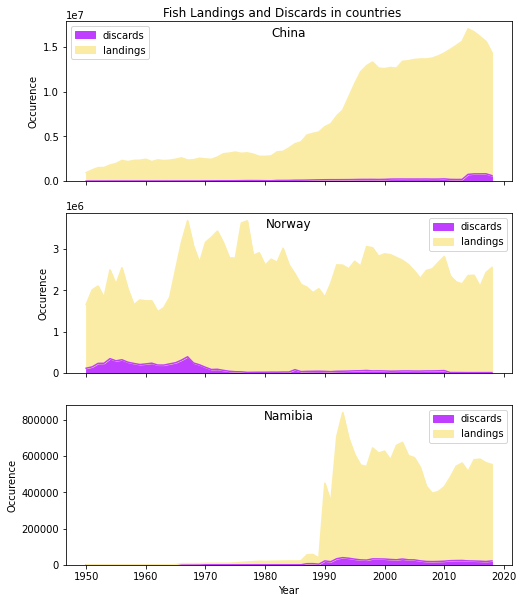

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,10), sharex=True)
fig.suptitle('Fish Landings and Discards in countries', y = 0.9)

for i in range(3):
    fld[fld['Entity'] == countries[i]].plot.area(ax=axes[i],color=['#BF3EFF','#fbeca5'])
#         crimeGroupByYear.plot.bar(ax=row,color='lavender',edgecolor = 'mediumpurple')
    axes[i].set_ylabel("Occurence")
    axes[i].set_title(countries[i], y=1, pad=-15)
#         row.set_ylim([0, 1.3*crimeGroupByYear.max()])  

# aquaculture

In [46]:
capture_aqua = pd.read_csv('capture-fisheries-vs-aquaculture.csv')

In [47]:
capture_aqua_entity = capture_aqua[['Entity','Year','Aquaculture production (metric tons)','Capture fisheries production (metric tons)']]
capture_aqua_entity = capture_aqua_entity.sort_values(by=['Year'])

In [48]:
ca_Na = capture_aqua_entity[capture_aqua_entity["Entity"]=='Namibia']
ca_C = capture_aqua_entity[capture_aqua_entity["Entity"]=='China']
ca_N = capture_aqua_entity[capture_aqua_entity["Entity"]=='Norway']
ca_Na = ca_Na.set_index("Year")
ca_C = ca_C.set_index("Year")
ca_N = ca_N.set_index("Year")

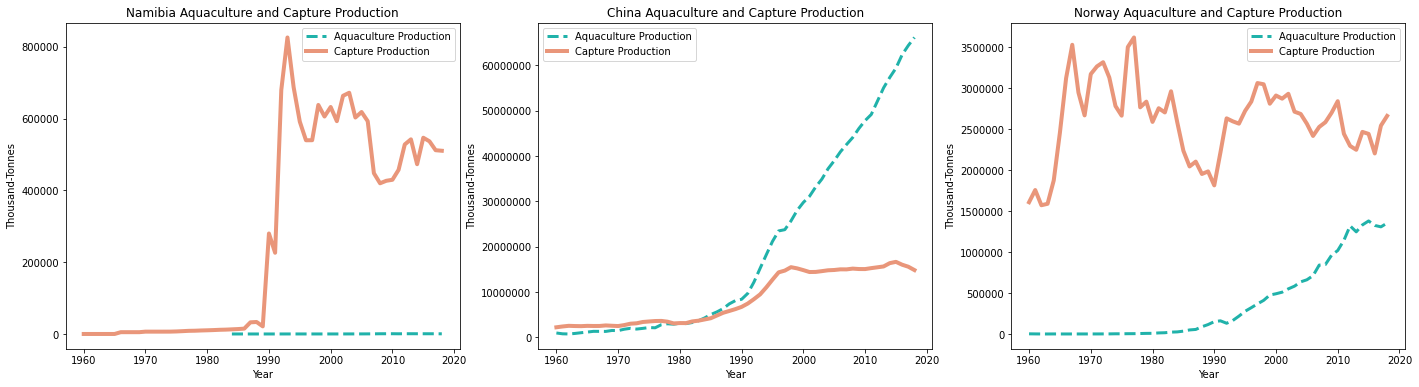

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(24,6))

axs[0].plot(ca_Na['Aquaculture production (metric tons)'],color='lightseagreen', linewidth=3,linestyle='dashed',label="Aquaculture Production")
axs[0].plot(ca_Na['Capture fisheries production (metric tons)'],color='#E9967A', linewidth=4, label='Capture Production')
axs[0].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[0].set_title('Namibia Aquaculture and Capture Production')
axs[0].set_ylabel('Thousand-Tonnes')
axs[0].set_xlabel('Year')
axs[0].legend()

axs[1].plot(ca_C['Aquaculture production (metric tons)'],color='lightseagreen',linewidth=3,linestyle='dashed',label="Aquaculture Production")
axs[1].plot(ca_C['Capture fisheries production (metric tons)'],color='#E9967A', linewidth=4, label='Capture Production')
axs[1].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[1].set_title('China Aquaculture and Capture Production')
axs[1].set_ylabel('Thousand-Tonnes')
axs[1].set_xlabel('Year')
axs[1].legend()

axs[2].plot(ca_N['Aquaculture production (metric tons)'],color='lightseagreen', linewidth=3,linestyle='dashed',label="Aquaculture Production")
axs[2].plot(ca_N['Capture fisheries production (metric tons)'],color='#E9967A', linewidth=4, label='Capture Production')
axs[2].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[2].set_title('Norway Aquaculture and Capture Production')
axs[2].set_ylabel('Thousand-Tonnes')
axs[2].set_xlabel('Year')
axs[2].legend()

# Nitrogen and Phosphorus by aquaculture

In [50]:
nitrogen_emissions_seafood = pd.read_csv('nitrogen-emissions-seafood.csv')
phosphorous_emissions_seafood = pd.read_csv('phosphorous-emissions-seafood.csv')

In [51]:
nes_pes = pd.merge(nitrogen_emissions_seafood, phosphorous_emissions_seafood)

In [52]:
nes_pes = nes_pes.drop(columns=['Code','Year'])

In [53]:
nes_pes

,Entity,Nitrogen (kgN / t edible weight),Phosphorous (kgP / t edible weight)
0,Bivalves (farmed),-129.826851,-24.279077
1,Carp (farmed),147.795918,20.260490
2,Catfish (farmed),132.881697,20.816676
3,Chicken,204.100000,30.500000
4,Milkfish (farmed),146.536147,23.921392
5,Other freshwater fish (farmed),156.052190,37.502659
6,Other marine fish (farmed),234.552923,50.176161
7,Salmon (farmed),110.556509,26.619691
8,Seaweed (farmed),-14.652885,-10.142461
9,Shrimp (farmed),123.037034,23.984136


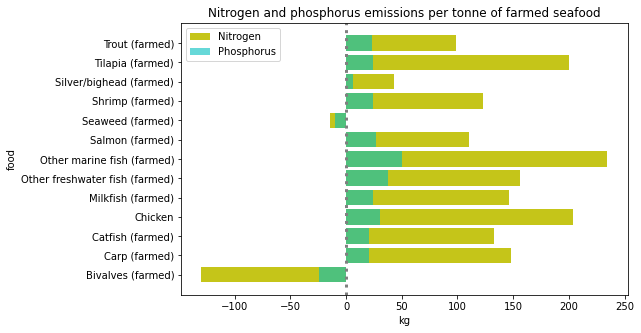

In [54]:
y = np.array(nes_pes['Entity'].tolist())
x_N = np.array(nes_pes['Nitrogen (kgN / t edible weight)'].tolist())
x_P = np.array(nes_pes['Phosphorous (kgP / t edible weight)'].tolist())

fig = plt.figure(figsize=(8, 5))
plt.barh(y,x_N,align='center', alpha=0.9, color = 'y', label = 'Nitrogen')
plt.barh(y,x_P,align='center', alpha=0.6, color = 'c', label = 'Phosphorus')
plt.axvline(color="grey",linestyle=":",linewidth=3)
plt.legend()
plt.title("Nitrogen and phosphorus emissions per tonne of farmed seafood")
plt.xlabel('kg')
plt.ylabel('food')

plt.show()

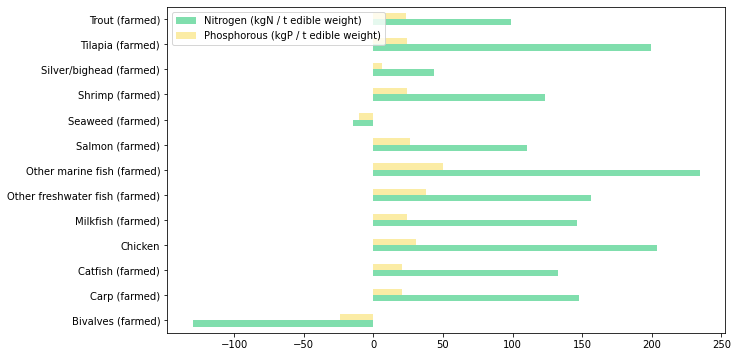

In [55]:
y = np.array(nes_pes['Entity'].tolist())
df = nes_pes[['Nitrogen (kgN / t edible weight)', 'Phosphorous (kgP / t edible weight)']]
df.index = y

ax = df.plot.barh(color=['#80dead','#fbeca5'], figsize=(10,6)).legend(loc='upper left')

# fig = plt.figure(figsize=(8, 5))
# plt.barh(y,x_N,align='center', alpha=0.9, color = 'y', label = 'Nitrogen')
# plt.barh(y,x_P,align='center', alpha=0.6, color = 'c', label = 'Phosphorus')
# plt.axvline(color="grey",linestyle=":",linewidth=3)
# plt.legend()
# plt.title("Nitrogen and phosphorus emissions per tonne of farmed seafood")
# plt.xlabel('kg')
# plt.ylabel('food')

# plt.show()